In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('MDCOVID19_MASTER_ZIP_CODE_CASES.csv')

zipsList = [21227,21207,21230,21251,21229,21237,21287,21231,21226,21206,21222,21225,21211,21208,\
            21205,21218,21234,21202,21201,21213,21210,21209,21216,21236,21217,21224,21215,21212,\
                21223,21214,21239,21228]

df = df[df['ZIP_CODE'].isin(zipsList)]

df = df.fillna(0)

df = df.drop('OBJECTID', axis=1)


df = df.transpose()
df.columns = df.iloc[0]
df = df.drop('ZIP_CODE')
df = df.reset_index()
df = df.rename(columns={'index':'Date'})


df['Date'] = df['Date'].map(lambda x: x.lstrip('F').lstrip('t').lstrip('o').lstrip('t')\
                            .lstrip('a').lstrip('l'))

dates = pd.DataFrame()
dates = df['Date'].str.split(pat='_', expand=True)
dates[0] = dates[0].map(lambda x: x.lstrip('0'))
dates['fdate'] = dates[2].str.cat(dates[0], sep='-').str.cat(dates[1],sep='-')

dates = dates['fdate']

df = df.drop('Date',axis=1)


df.insert(0,'Date',dates)

df['Date'] = pd.to_datetime(df['Date'])



df1 = df.transpose()
df1.columns = df1.iloc[0]
df1 = df1.drop('Date')
df1 = df1.reset_index()
df1 = df1.rename(columns={'ZIP_CODE':'zipcode1'})
df1['zipcode1'] = df1['zipcode1'].astype(int).astype(str)


df1 = pd.melt(df1,id_vars='zipcode1',value_name='cases')
df1 = df1[['Date','zipcode1','cases']]
df1['cases'] = df1['cases'].astype(int)

print(df1.head())

        Date zipcode1  cases
0 2020-04-11    21201     17
1 2020-04-11    21202     32
2 2020-04-11    21205     18
3 2020-04-11    21206     89
4 2020-04-11    21207     71


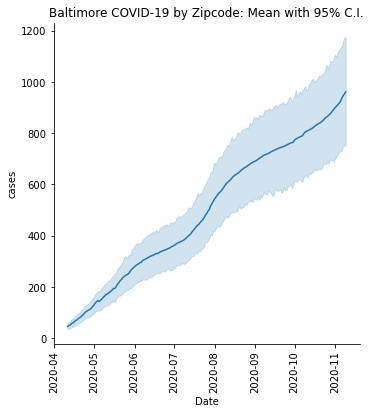

In [2]:
g = sns.relplot(x='Date',y='cases',data=df1,kind='line',palette='Spectral')
g.set(title='Baltimore COVID-19 by Zipcode: Mean with 95% C.I.')
g.set_xticklabels(rotation = 90)

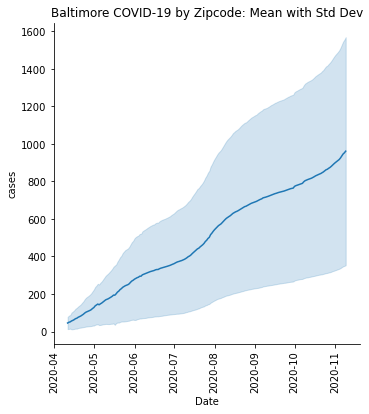

In [3]:
h = sns.relplot(x='Date',y='cases',data=df1,kind='line',palette='Spectral',ci='sd')
h.set(title='Baltimore COVID-19 by Zipcode: Mean with Std Dev')
h.set_xticklabels(rotation = 90)

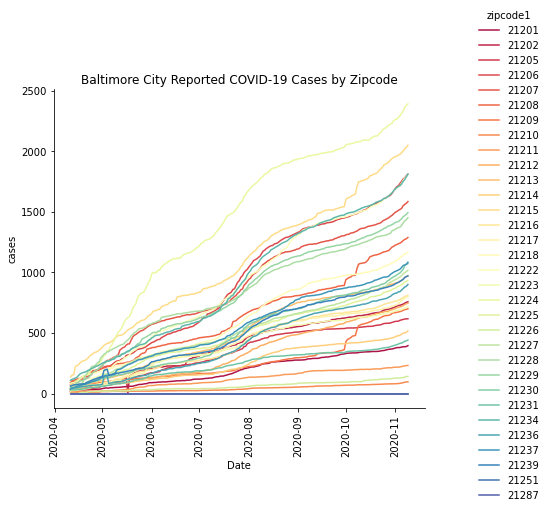

In [4]:
f = sns.relplot(x='Date',y='cases',data=df1,kind='line',hue='zipcode1',legend='full',palette='Spectral')
f.set(title='Baltimore City Reported COVID-19 Cases by Zipcode')
f.add_legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=2)
f.set_xticklabels(rotation = 90)